## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1.1

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50): #Ran the data
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

1.2

In [7]:
import matplotlib.pyplot as plt #Import everything
from sklearn.cluster import KMeans
import seaborn as sns

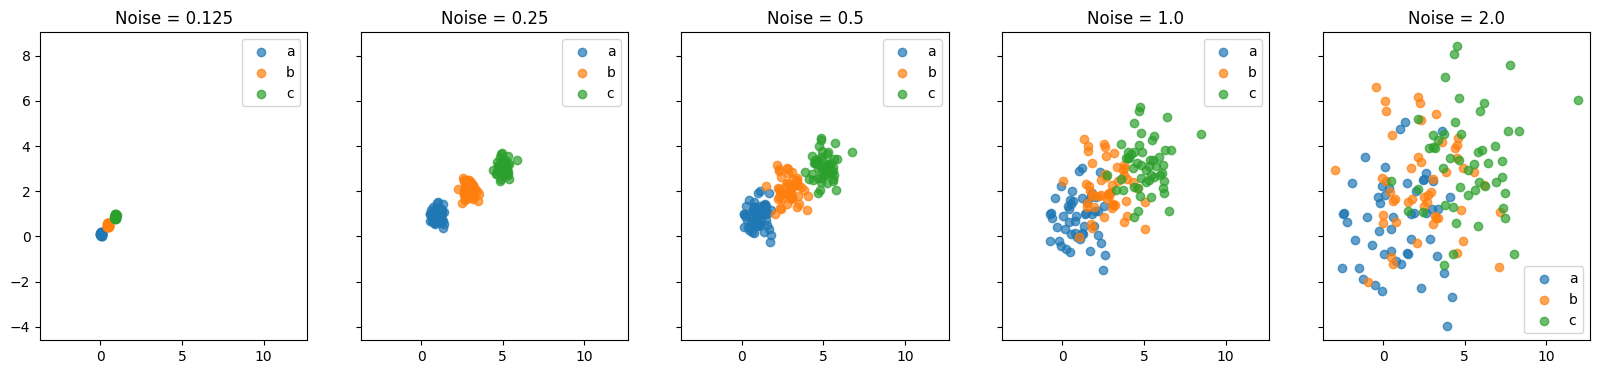

In [8]:
datasets = {
    "Noise = 0.125": df0_125, #for each graph
    "Noise = 0.25": df0_25,
    "Noise = 0.5": df0_5,
    "Noise = 1.0": df1_0,
    "Noise = 2.0": df2_0,
}

fig, axes = plt.subplots(1, 5, figsize = (20, 4), sharex = True, sharey = True)

for ax, (title, df) in zip(axes, datasets.items()): #plot graphs
    for grp, grp_df in df.groupby("group"):
        ax.scatter(grp_df.x1, grp_df.x2, label = grp, alpha = 0.7)
    ax.set_title(title)
    ax.legend()

plt.show()

#As the noise goes up, I noticed that the visual distinctness of each group becomes more widespread rather than concentrated.
#In the graph where noise = 0.125, I noticed that the groups are still quite defined as three different groups.
#But as noise goes up to 2.0, I noticed that the groups are much less defined. In fact, it just looks like a cluster of datapoints together with no discernable difference in groups.

1.3

As the noise increases, the clusters become less defined. Looking at the scree plot, the y-axis also becomes smaller. This means the curve is decreasing and getting less defined. This also makes the elbow less clear, which will make it difficult to choose k.

In [5]:
def maxmin(x): #maxmin
    x = (x-min(x))/(max(x)-min(x))
    return x

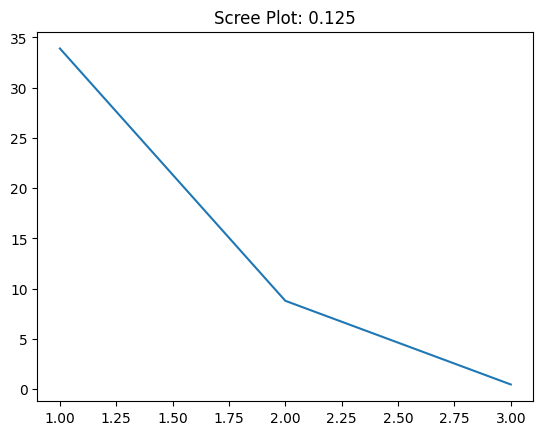

In [12]:
df0_125["x1"] = maxmin(df0_125["x1"]) #For 0.125
df0_125["x2"] = maxmin(df0_125["x2"])

X = df0_125[["x1", "x2"]]
k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot: 0.125")

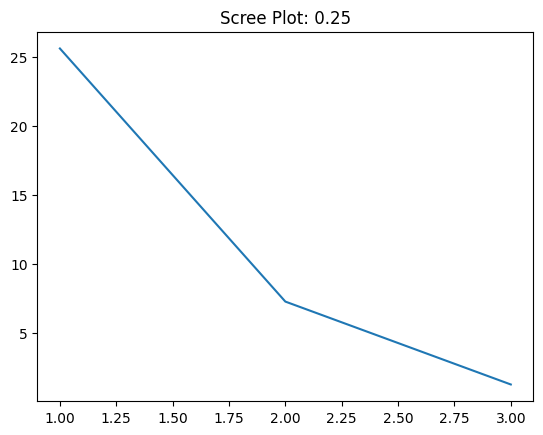

In [13]:
df0_25["x1"] = maxmin(df0_25["x1"]) #For 0.25
df0_25["x2"] = maxmin(df0_25["x2"])

X = df0_25[["x1", "x2"]]
k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot: 0.25")

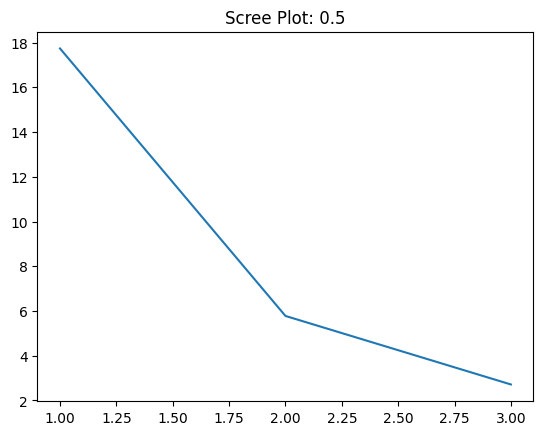

In [14]:
df0_5["x1"] = maxmin(df0_5["x1"]) #For 0.5
df0_5["x2"] = maxmin(df0_5["x2"])

X = df0_5[["x1", "x2"]]
k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot: 0.5")

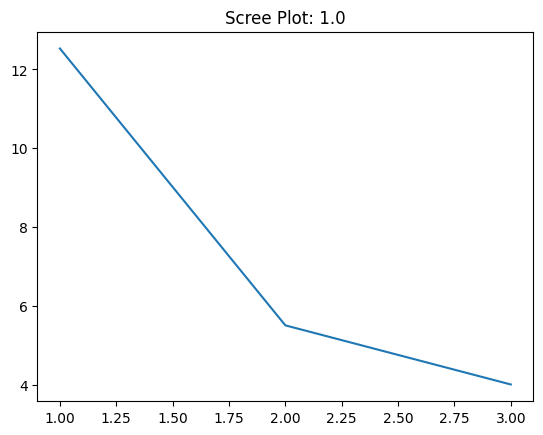

In [15]:
df1_0["x1"] = maxmin(df1_0["x1"]) #For 1.0
df1_0["x2"] = maxmin(df1_0["x2"])

X = df1_0[["x1", "x2"]]
k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot: 1.0")

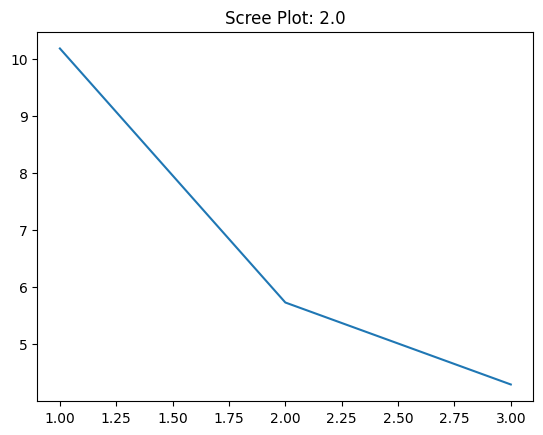

In [16]:
df2_0["x1"] = maxmin(df2_0["x1"]) #For 2.0
df2_0["x2"] = maxmin(df2_0["x2"])

X = df2_0[["x1", "x2"]]
k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot: 2.0")

1.4

The elbow is the point where adding more clusters won't give bigger gains to the compactness of the curve or won't reduce the SSE. It is also the best way to pick the best k value. Looking at our example, because we have three clusters, k = 3. Anything below makes the graph linear and anything above makes it have more elbows. Increasing noise also makes the elbow less clear.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

2.1

In [17]:
cycle_df = pd.read_csv("2022 election cycle fundraising.csv")
cycle_df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [20]:
cycle_df_clean = cycle_df[["Raised", "Spent", "Cash on Hand", "Debts"]].copy() #Select relevant columns

for col in cycle_df_clean.columns: #Remove $ and commas
    cycle_df_clean[col] = cycle_df_clean[col].str.replace("$", "", regex = False)
    cycle_df_clean[col] = cycle_df_clean[col].str.replace(",", "", regex = False)

cycle_df_clean = cycle_df_clean.astype(float) #Convert everything to float

cycle_df_clean.head() #Generate first few rows

,Raised,Spent,Cash on Hand,Debts
0,7719396.0,7449678.0,851851.0,0.0
1,2192741.0,1243502.0,2472888.0,0.0
2,20993041.0,13957854.0,20942888.0,0.0
3,1211111.0,1173466.0,623472.0,0.0
4,1617611.0,1664674.0,1098579.0,0.0


2.2

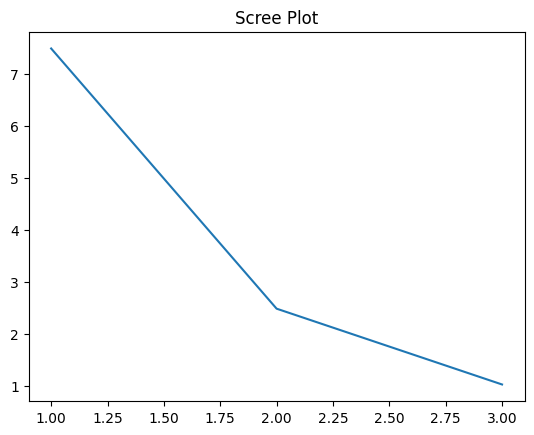

In [21]:
def minmax(x): #Minmax
    x = (x-min(x))/(max(x)-min(x))
    return x
max_raised = cycle_df_clean["Raised"].max()
min_raised = cycle_df_clean["Raised"].min()
max_spent = cycle_df_clean["Spent"].max()
min_spent = cycle_df_clean["Spent"].min()

cycle_df_clean["Raised"] = minmax(cycle_df_clean["Raised"])
cycle_df_clean["Spent"] = minmax(cycle_df_clean["Spent"])
X = cycle_df_clean[["Raised", "Spent"]]

k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

Scree_plot = sns.lineplot(x=np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot")

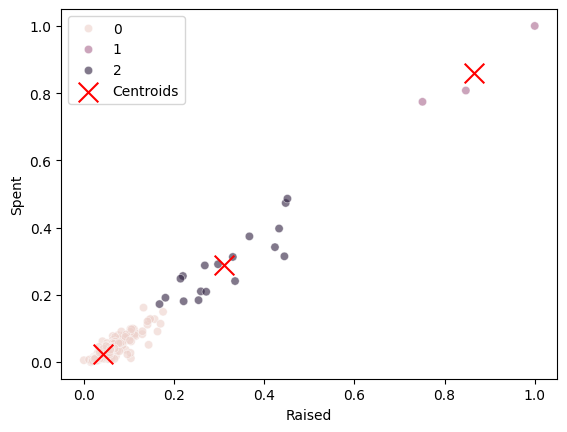

In [27]:
sns.scatterplot(
    data = cycle_df_clean,
    x = "Raised",
    y = "Spent",
    hue = model.labels_,
    alpha = 0.6
)

centers = model.cluster_centers_ #Extract centroids

plt.scatter(
    centers[:, 0], centers[:, 1],
    c = "red", s = 200, marker = "x", label = "Centroids"
)

plt.legend()
plt.show()

From the above graph, I noticed that those who raised the least amount of money spent the least amount of money. Those who raised the most money actually are part of the smallest clusters on the graph. Some notable names include Adam Schiff, Chuck Schumer, David Trone, John Kennedy, John Thune, Josh Gotteimer, Katie Porter, Lindsey Graham, Mark Kelly, Raja Krishnamoorthi,Raphael Warnock,Ron Johnson, and Tim Scott.

In [32]:
cycle_df_clean["Cluster"] = model.labels_
print(cycle_df_clean["Cluster"].value_counts())
smallest_cluster = cycle_df_clean["Cluster"].value_counts().index[-2:]
smallest_pol = cycle_df_clean[cycle_df_clean["Cluster"].isin(smallest_clusters)]
print(smallest_pol[["Raised", "Spent", "Cluster"]])

Cluster
2    511
1     24
0      2
Name: count, dtype: int64
       Raised     Spent  Cluster
0    0.103512  0.098074        2
1    0.040686  0.016371        2
2    0.254404  0.183753        1
3    0.029527  0.015449        2
4    0.034148  0.021915        2
..        ...       ...      ...
532  0.025901  0.010847        2
533  0.105571  0.097157        2
534  0.023538  0.008720        2
535  0.058704  0.036159        2
536  0.034852  0.027688        2

[535 rows x 3 columns]


2.3

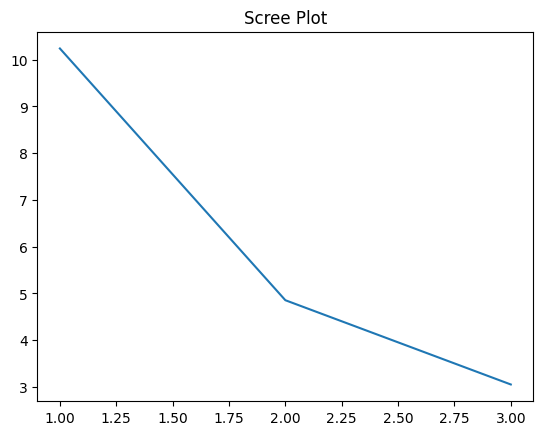

In [30]:
def minmax(x): #Minmax
    x = (x-min(x))/(max(x)-min(x))
    return x
max_raised = cycle_df_clean["Cash on Hand"].max()
min_raised = cycle_df_clean["Cash on Hand"].min()
max_spent = cycle_df_clean["Debts"].max()
min_spent = cycle_df_clean["Debts"].min()

cycle_df_clean["Cash on Hand"] = minmax(cycle_df_clean["Cash on Hand"])
cycle_df_clean["Debts"] = minmax(cycle_df_clean["Debts"])
X = cycle_df_clean[["Cash on Hand", "Debts"]]

k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

Scree_plot = sns.lineplot(x=np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot")

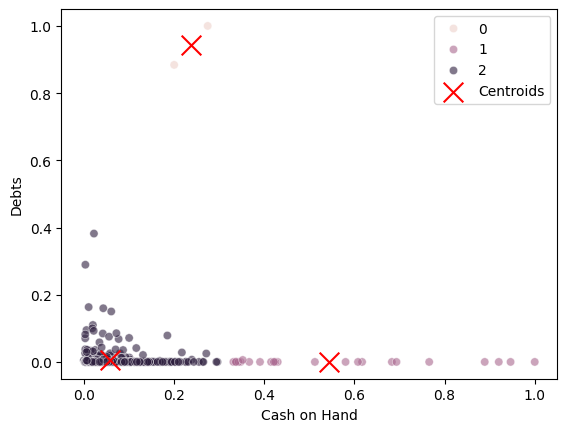

In [31]:
sns.scatterplot(
    data = cycle_df_clean,
    x = "Cash on Hand",
    y = "Debts",
    hue = model.labels_,
    alpha = 0.6
)

centers = model.cluster_centers_ #Extract centroids

plt.scatter(
    centers[:, 0], centers[:, 1],
    c = "red", s = 200, marker = "x", label = "Centroids"
)

plt.legend()
plt.show()

In the above graph, I don't see a defined/established relationship between Cash on Hand and Debts. The two smallest clusters on this graph contain the same politicians as the two smallest clusters in the previous graph. This could be because in the politician races, the votes could be close so they want to spend as much money as possible to push the odds in someone's favor.

In [34]:
cycle_df_clean["Cluster"] = model.labels_
print(cycle_df_clean["Cluster"].value_counts())
smallest_cluster = cycle_df_clean["Cluster"].value_counts().index[-2:]
smallest_pol = cycle_df_clean[cycle_df_clean["Cluster"].isin(smallest_cluster)]
print(smallest_pol[["Debts", "Cash on Hand", "Cluster"]])

Cluster
2    511
1     24
0      2
Name: count, dtype: int64
        Debts  Cash on Hand  Cluster
2    0.000000      0.920268        1
11   0.000429      0.336539        1
45   0.000000      0.429999        1
89   0.000000      0.889092        1
112  0.000000      0.338877        1
133  1.000000      0.274716        0
239  0.000000      0.390752        1
247  0.000000      0.415249        1
261  0.000000      0.683153        1
267  0.000000      0.765940        1
274  0.000000      0.617185        1
290  0.000000      0.693338        1
298  0.000000      0.331706        1
303  0.000000      0.347895        1
310  0.000000      0.608044        1
328  0.000000      0.424774        1
340  0.000000      0.580473        1
384  0.000000      0.343261        1
412  0.000000      0.512454        1
414  0.000000      0.366809        1
417  0.000000      1.000000        1
423  0.000000      0.421546        1
442  0.884067      0.200342        0
488  0.000000      0.337125        1
500  0.000000 

2.4

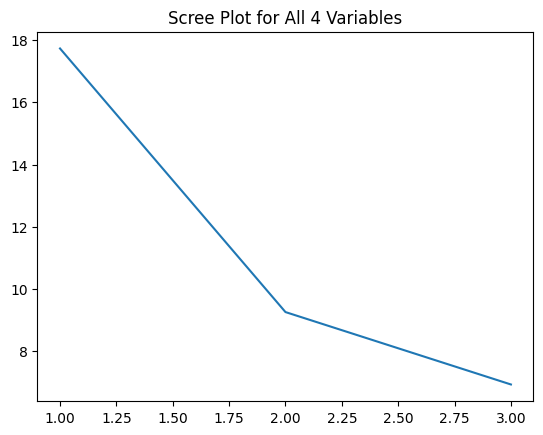

In [36]:
cycle_df_clean["Raised"] = minmax(cycle_df_clean["Raised"]) #Cluster all four variables
cycle_df_clean["Spent"] = minmax(cycle_df_clean["Spent"])
cycle_df_clean["Cash on Hand"] = minmax(cycle_df_clean["Cash on Hand"])
cycle_df_clean["Debts"] = minmax(cycle_df_clean["Debts"])
X = cycle_df_clean[["Raised", "Spent", "Cash on Hand", "Debts"]]

k_bar = 3
SSE = []

for k in range(1, k_bar + 1):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title("Scree Plot for All 4 Variables")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


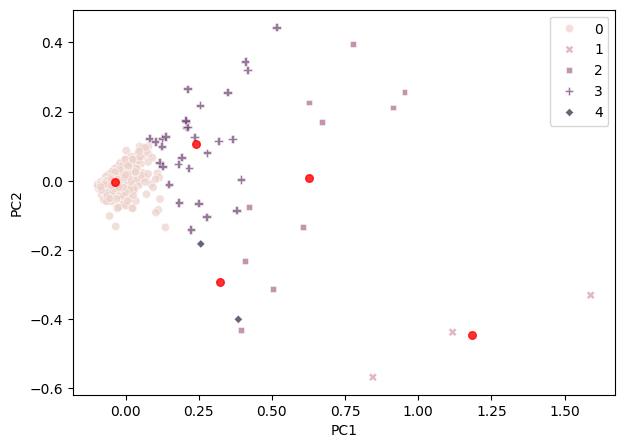

In [46]:
from sklearn.decomposition import PCA

X = cycle_df_clean[["Raised", "Spent", "Cash on Hand", "Debts"]].apply(minmax)
model = KMeans(n_clusters=5, random_state=0)
cycle_df_clean['g_hat'] = model.fit_predict(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
cycle_df_clean["PC1"] = pcs[:,0]
cycle_df_clean["PC2"] = pcs[:,1]

centers = model.cluster_centers_
centers_pca = pca.transform(centers)
centroid_pc1 = centers_pca[:,0]
centroid_pc2 = centers_pca[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=cycle_df_clean,
    x="PC1", y="PC2",
    hue="g_hat", style="g_hat",
    alpha=0.7
)

plt.scatter(centroid_pc1, centroid_pc2, c='red', s=30, alpha=0.8)

plt.legend()
plt.show()

In [49]:
centers = model.cluster_centers_
centers_rescaled = pd.DataFrame({
    "Raised": centers[:,0] * (cycle_df_clean["Raised"].max() - cycle_df_clean["Raised"].min()) + cycle_df_clean["Raised"].min(),
    "Spent": centers[:,1] * (cycle_df_clean["Spent"].max() - cycle_df_clean["Spent"].min()) + cycle_df_clean["Spent"].min(),
    "Cash on Hand": centers[:,2] * (cycle_df_clean["Cash on Hand"].max() - cycle_df_clean["Cash on Hand"].min()) + cycle_df_clean["Cash on Hand"].min(),
    "Debts": centers[:,3] * (cycle_df_clean["Debts"].max() - cycle_df_clean["Debts"].min()) + cycle_df_clean["Debts"].min()
})
centers_rescaled["Cluster"] = range(len(centers_rescaled))

print(centers_rescaled)

     Raised     Spent  Cash on Hand     Debts  Cluster
0  0.040120  0.022807      0.052334  0.006448        0
1  0.866091  0.860647      0.624840  0.000000        1
2  0.371505  0.331046      0.539350  0.000512        2
3  0.125362  0.091382      0.329075  0.002137        3
4  0.246933  0.201486      0.237529  0.942033        4


Looking at the data, there seems to be a similar trend. Those who use less money or raise less money tend to have the least debts or cash. Those who used more money tended to have more debts on hand. There is an outlier for those who didn't spend that much money but still had a lot of debts.

2.5

Based on the data, it seems as though politicians who raise or spend less money also tend to have less debts or cash on hand. In contrast, the politicians who raise or spend more money tend to have more debts/cash on hand (if they don't have debts). It's also clear that whenever two politicians both have an equally likely chance of winning an election, they're going to funnel more money into their campaign to push the odds towards one of their favors. So, the algorithm did find useful patterns for us to analyze.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

Didn't do this one.